In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

#These are both encoding techniques used for converting categorical (non-numeric) 
#data into numerical values so that machine learning models can process them.
#OrdinalEncoder for data you can put in order f.e. "cold" "normal" "hot" -> 0 , 1 , 2
#OneHotEncoder for data that cant be ordered in easy way f.e. colors, names, places ect.
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#Handeling NaN values in dataset
from sklearn.impute import SimpleImputer

#Applies different transformations to different columns of a dataset at once.
from sklearn.compose import make_column_transformer
#both do almost the same thing, combines multiple preprocessing steps and a machine learning model into a single workflow.
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression   
#Support Vector Classification
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
#reading data from csv's
data_train = pd.read_csv("csv/train.csv")
data_test = pd.read_csv("csv/test.csv")

In [3]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#data_train.dtypes
data_train.info()

#we have 5 object type in the data set so we need to deal with that
#if we want to use them in ml model
#there are a lot of missing values in some collumns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#adding more columns: family size
data_train['FamSize'] = data_train['SibSp'] + data_train['Parch'] + 1
data_test['FamSize'] = data_test['SibSp'] + data_test['Parch'] + 1

#modifing age column -> age group
data_train['AgeGroup'] = pd.qcut(data_train['Age'],10)
data_test['AgeGroup'] = pd.qcut(data_test['Age'],10)

#modifing fare column -> fare group
data_train['FareGroup'] = pd.qcut(data_train['Fare'],5)
data_test['FareGroup'] = pd.qcut(data_test['Fare'],5)

#new column -> length of a name
data_train['NameLength'] = data_train['Name'].apply(lambda x: len(x))
data_test['NameLength'] = data_test['Name'].apply(lambda x: len(x))

#and grouping of name column
data_train['NameLengthGroup'] = pd.qcut(data_train['NameLength'],5)
data_test['NameLengthGroup'] = pd.qcut(data_test['NameLength'],5)

In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamSize,NameLength
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,26.965208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,9.281607
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,12.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,20.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,25.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,82.000000


In [7]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

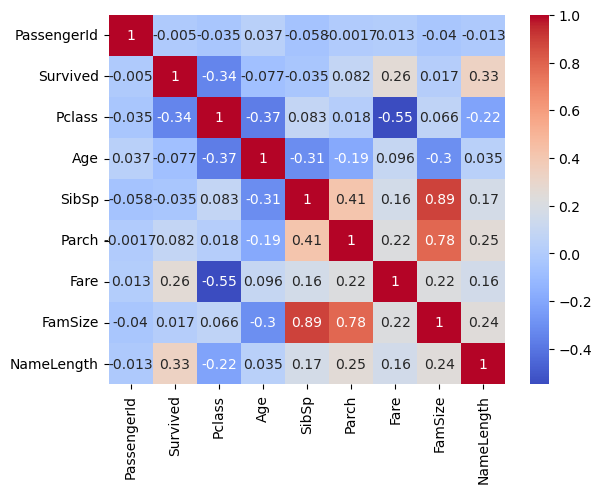

In [8]:
#looking for correlations in data
sns.heatmap(data_train.select_dtypes(include=["number"]).corr(),annot=True, cmap="coolwarm")

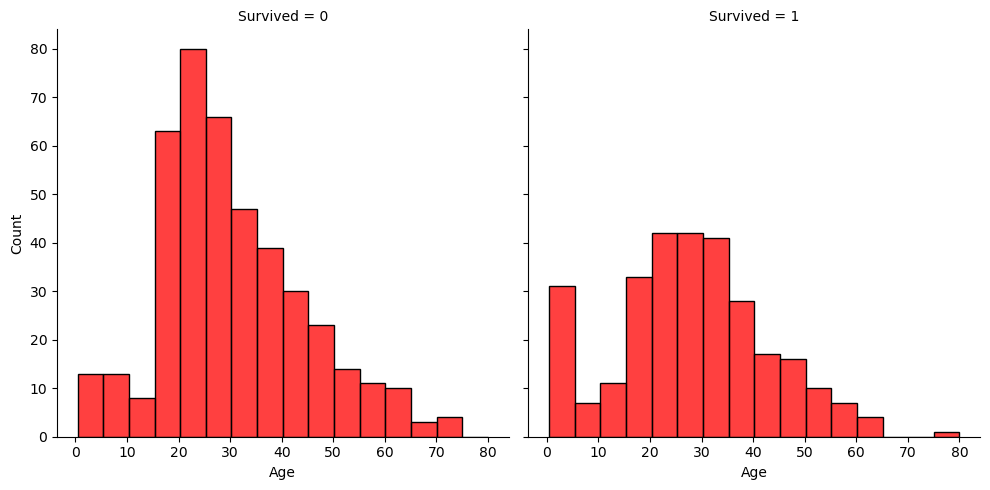

In [9]:
#looking at the age plot -> will probably group it for easier, more readable data
sns.displot(data_train, x='Age', col='Survived', binwidth=5, color="red")

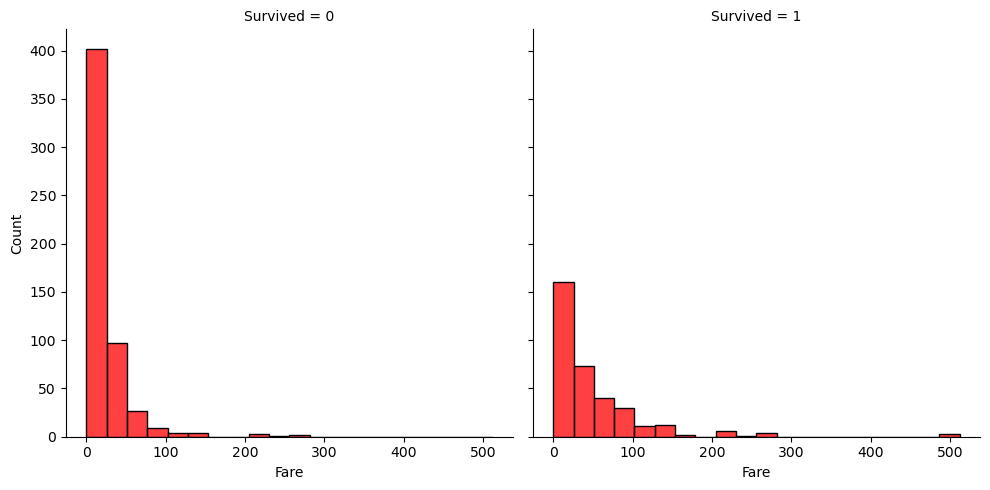

In [10]:
sns.displot(data_train, x='Fare', col='Survived', binwidth=25, color="red")

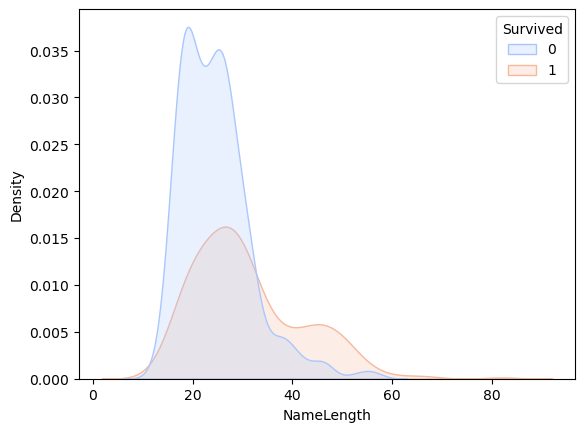

In [11]:
#analysis of relations beetwenn name length and survival 

sns.kdeplot(data=data_train , x='NameLength',hue='Survived',palette="coolwarm", fill = True)
plt.show()

In [12]:
#looking throug differen groupby's to analise the data
# IPython.display used here to display multiple df's in one cell
display(
    data_train.groupby(['Pclass'], as_index=False)['Survived'].mean(),
    data_train.groupby(['Sex'], as_index=False)['Survived'].mean(),
    data_train.groupby(['SibSp'], as_index=False)['Survived'].mean(),
    data_train.groupby(['Parch'], as_index=False)['Survived'].mean(),
    data_train.groupby(['FamSize'], as_index=False)['Survived'].mean(),
    data_train.groupby(['Embarked'], as_index=False)['Survived'].mean(),
    data_train.groupby(['AgeGroup'],observed=False, as_index=False)['Survived'].mean(),
    data_train.groupby(['FareGroup'],observed=False, as_index=False)['Survived'].mean(),
    data_train.groupby(['NameLengthGroup'],observed=False, as_index=False)['Survived'].mean()
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,female,0.742038
1,male,0.188908


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


,FamSize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


,AgeGroup,Survived
0,"(0.419, 14.0]",0.584416
1,"(14.0, 19.0]",0.390805
2,"(19.0, 22.0]",0.283582
3,"(22.0, 25.0]",0.371429
4,"(25.0, 28.0]",0.393443
5,"(28.0, 31.8]",0.393939
6,"(31.8, 36.0]",0.483516
7,"(36.0, 41.0]",0.358491
8,"(41.0, 50.0]",0.397436
9,"(50.0, 80.0]",0.343750


,FareGroup,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


,NameLengthGroup,Survived
0,"(11.999, 19.0]",0.220588
1,"(19.0, 23.0]",0.301282
2,"(23.0, 27.0]",0.319797
3,"(27.0, 32.0]",0.442424
4,"(32.0, 82.0]",0.674556


In [13]:
#changing age column to more readable format based on AgeGroup 
bins = [0, 14, 19, 22, 25, 28, 31.8, 36, 41, 50, 80]
labels = [0,1,2,3,4,5,6,7,8,9]

#you should re-run this block only after restarting kernel, else it will only show one category 
meanAge = data_train['Age'].mean()
#we need to fill nan values first
data_train['Age'] = data_train['Age'].fillna(meanAge)
data_train['Age'] = pd.cut(data_train['Age'], bins=bins, labels=labels, include_lowest=True).astype(int)

#same for test
meanAge_test = data_test['Age'].mean()
data_test['Age'] = data_test['Age'].fillna(meanAge_test)
data_test['Age'] = pd.cut(data_test['Age'], bins=bins, labels=labels, include_lowest=True).astype(int)


data_train.groupby(['Age'],observed=False, as_index=False)['Survived'].mean()

,Age,Survived
0,0,0.584416
1,1,0.390805
2,2,0.283582
3,3,0.371429
4,4,0.393443
5,5,0.320988
6,6,0.483516
7,7,0.358491
8,8,0.397436
9,9,0.343750


In [14]:
#changing fare column to more readable format based on FareGroup 
bins = [0, 7.854, 10.5, 21.679, 39.688, 512.329]
labels = [0,1,2,3,4]

#you should re-run this block only after restarting kernel, else it will only show one category 
meanFare = data_train['Fare'].mean()
#we need to fill nan values first
data_train['Fare'] = data_train['Fare'].fillna(meanFare)
data_train['Fare'] = pd.cut(data_train['Fare'], bins=bins, labels=labels, include_lowest=True)

#same for test
meanFare_test = data_test['Fare'].mean()
data_test['Fare'] = data_test['Fare'].fillna(meanFare_test)
data_test['Fare'] = pd.cut(data_test['Fare'], bins=bins, labels=labels, include_lowest=True)

data_train.groupby(['Fare'],observed=False, as_index=False)['Survived'].mean()

,Fare,Survived
0,0,0.216867
1,1,0.203046
2,2,0.426901
3,3,0.441989
4,4,0.635838


In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    int32   
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             888 non-null    category
 10  Cabin            204 non-null    object  
 11  Embarked         889 non-null    object  
 12  FamSize          891 non-null    int64   
 13  AgeGroup         714 non-null    category
 14  FareGroup        891 non-null    category
 15  NameLength       891 non-null    int64   
 16  NameLengthGroup  891 non-null    category
dt

In [39]:
#changing name length column to more readable format based on NameLengthGropu 
bins = [11.999, 19.0, 23.0, 27.0, 32.0, 82.0]
labels = [0,1,2,3,4]

#you should re-run this block only after restarting kernel, else it will only show one category 
meanNameLength = data_train['NameLength'].mean()
#we need to fill nan values first
data_train['NameLength'] = data_train['NameLength'].fillna(meanNameLength)
data_train['NameLength'] = pd.cut(data_train['NameLength'], bins=bins, labels=labels, include_lowest=True)

#same for test
meanNameLength_test = data_test['NameLength'].mean()
data_test['NameLength'] = data_test['NameLength'].fillna(meanNameLength_test)
data_test['NameLength'] = pd.cut(data_test['NameLength'], bins=bins, labels=labels, include_lowest=True)

data_train.groupby(['NameLength'],observed=False, as_index=False)['Survived'].mean()

,NameLength,Survived
0,0,0.220588
1,1,0.301282
2,2,0.319797
3,3,0.442424
4,4,0.674556
